
# PLANEACION DEL PROYECTO:

* COMPARAR NUESTRAS VARIABLES TANTO NUMERICAS COMO CATEGORICAS VS (PROFYT, SALES), UNA VEZ DETERMINADA LA RELACIÓN VEMOS EL NIVEL DE CORRLEACIÓN Y SI IMPACTA EN NUETRA TARGET SE MANTIENE LA VARIABLE SINO SE DROPEA. 

* PARTE 1

GRAFICOS DE DISTRIBUCION 1 VARIABLE
GRAFICOS DE DOS VARIABLES 1 VS 1
GRAFICOS ELABORADOS CON GROUP BY. 
GRAFICOS BOXPLOT, VIOLIN PLOT. 

* PARTE 2 
LIMPIEZA 
CODIFICACION 
NORMALIZACION 
EXTREMOS 

* PARTE 3 
MODELAMIENTO
REGRESION 
MULTICLASIFICACION 
PERFILAMIENTO

* PARTE 4
 CONCLUISONES

 ## FECHA LIMITE DE TERMINACION SABADO 9 DE DICIEMBRE 


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#df = pd.read_csv("data.csv",delimiter=";")
df = pd.read_csv("./datasets/superstore.csv")
df.head()

pd.set_option('display.max_columns', None)


In [13]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'postal_code', 'market', 'region', 'product_id', 'category',
       'sub-category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

In [14]:
df.isna().sum()

row_id                0
order_id              0
order_date            0
ship_date             0
ship_mode             0
customer_id           0
customer_name         0
segment               0
city                  0
state                 0
country               0
postal_code       41296
market                0
region                0
product_id            0
category              0
sub-category          0
product_name          0
sales                 0
quantity              0
discount              0
profit                0
shipping_cost         0
order_priority        0
dtype: int64

In [15]:
df.duplicated().sum()

0

# EDA

In [16]:
target = ['sales', 'profit']

In [17]:
df['order_priority'].value_counts()

order_priority
Medium      29433
High        15501
Critical     3932
Low          2424
Name: count, dtype: int64

In [18]:
df.describe()

,row_id,postal_code,sales,quantity,discount,profit,shipping_cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [19]:
print (df.shape)
df.columns

(51290, 24)


Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'postal_code', 'market', 'region', 'product_id', 'category',
       'sub-category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

In [20]:
df_na = df.isna().sum()

In [21]:
df.groupby(["ship_mode","order_priority",'category'])[['sales', 'discount',
       'profit', 'shipping_cost']].mean()


sales  discount  \
ship_mode      order_priority category                                
First Class    Critical       Furniture        397.129866  0.141818   
                              Office Supplies  126.661999  0.143469   
                              Technology       437.447099  0.138320   
               High           Furniture        424.920079  0.172163   
                              Office Supplies  115.624122  0.143573   
                              Technology       460.547588  0.152458   
               Medium         Furniture        400.513321  0.176460   
                              Office Supplies  125.341824  0.146989   
                              Technology       491.820949  0.139621   
Same Day       Critical       Furniture        419.771417  0.152520   
                              Office Supplies  112.804900  0.116939   
                              Technology       518.155856  0.147551   
               High           Furniture        384.110905  0.178008   
                              Office Supplies  118.595921  0.150946   
                              Technology       519.354052  0.151386   
               Medium         Furniture        385.767780  0.149440   
                              Office Supplies  119.950161  0.120845   
                              Technology       533.849345  0.168388   
Second Class   Critical       Furniture        450.873581  0.165630   
                              Office Supplies  140.202417  0.128545   
                              Technology       514.018533  0.122347   
               High           Furniture        410.641145  0.167645   
                              Office Supplies  124.408998  0.130549   
                              Technology       452.282938  0.133598   
               Medium         Furniture        409.779197  0.183231   
                              Office Supplies  124.993217  0.136840   
                              Technology       463.811286  0.130084   
Standard Class High           Furniture        418.480085  0.167881   
                              Office Supplies  118.711433  0.135630   
                              Technology       477.186871  0.128576   
               Low            Furniture        406.804642  0.173208   
                              Office Supplies  118.313119  0.137909   
                              Technology       430.105449  0.123917   
               Medium         Furniture        421.722499  0.165310   
                              Office Supplies  119.771989  0.137909   
                              Technology       463.985534  0.135305   

                                                  profit  shipping_cost  
ship_mode      order_priority category                                   
First Class    Critical       Furniture        53.093399     107.268416  
                              Office Supplies  14.515780      29.068152  
                              Technology       66.307764     112.768609  
               High           Furniture        26.721000      68.259953  
                              Office Supplies  13.958560      19.305089  
                              Technology       54.774336      73.541304  
               Medium         Furniture        23.572242      50.295398  
                              Office Supplies  18.242413      14.673477  
                              Technology       69.365351      53.727946  
Same Day       Critical       Furniture        44.377157     110.746299  
                              Office Supplies  19.928010      29.417736  
                              Technology       31.068475     136.756884  
               High           Furniture        31.185541      59.716289  
                              Office Supplies  14.810819      18.430078  
                              Technology       61.419839      86.366598  
               Medium         Furniture        41.424208      42.934400  
                     

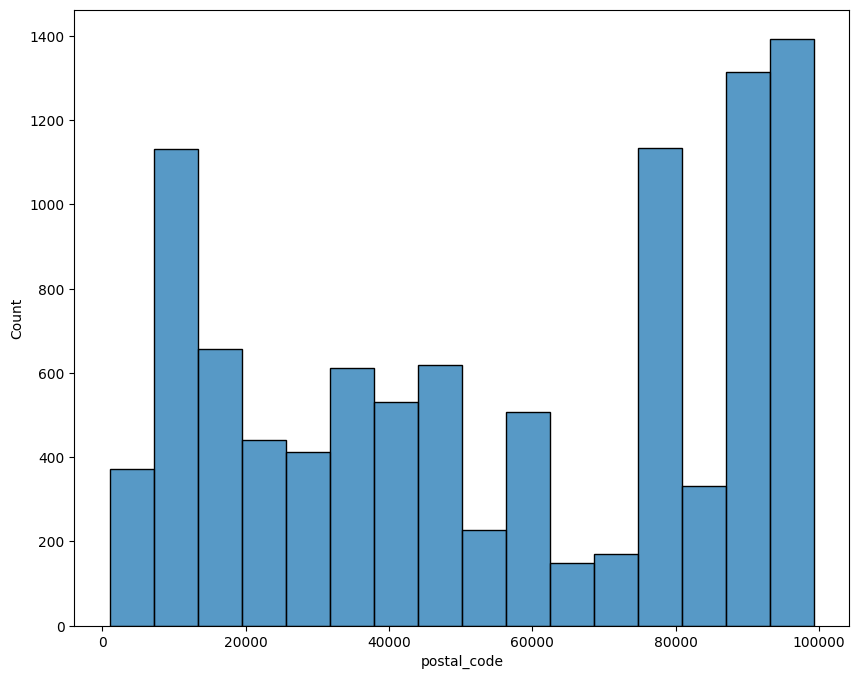

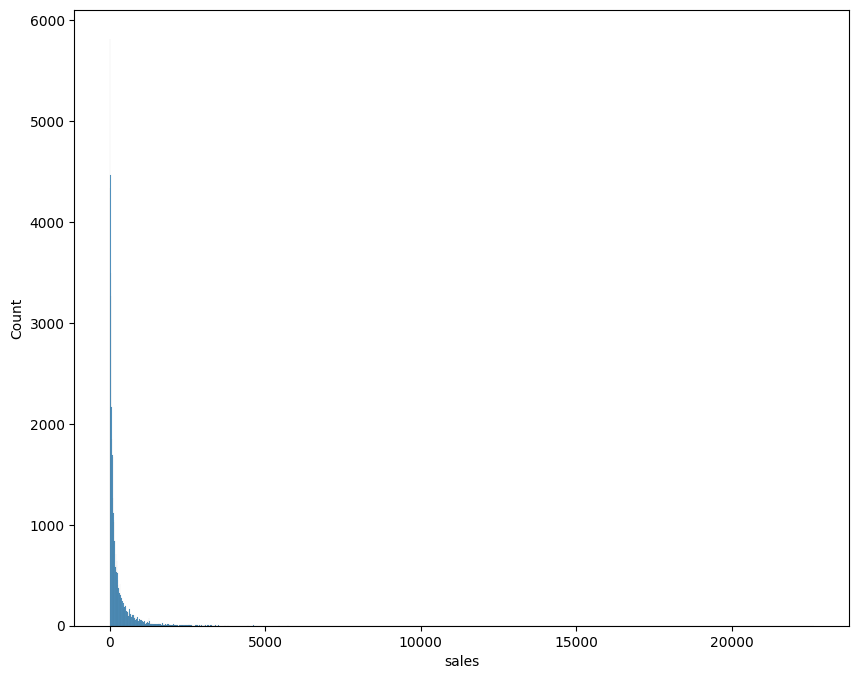

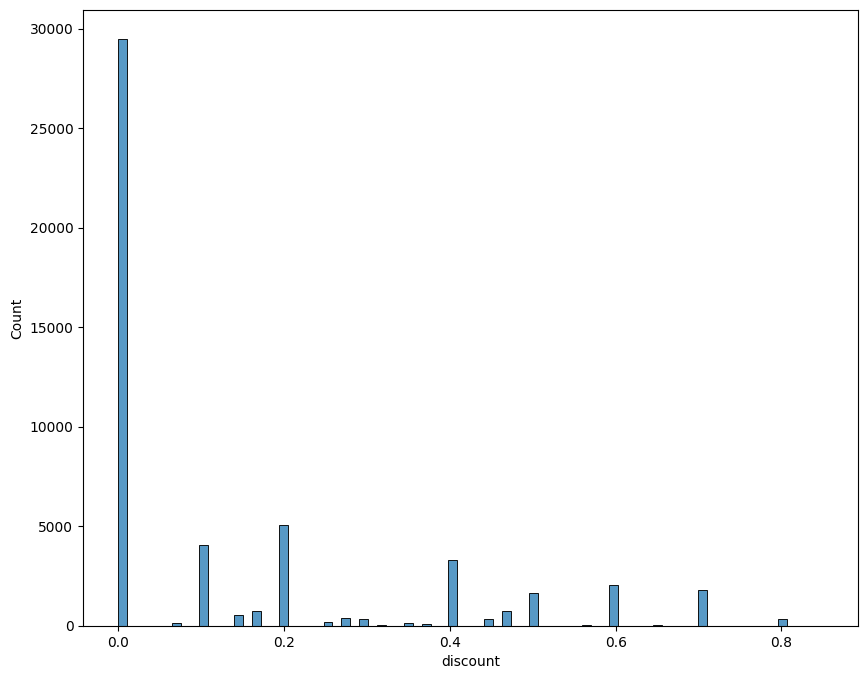

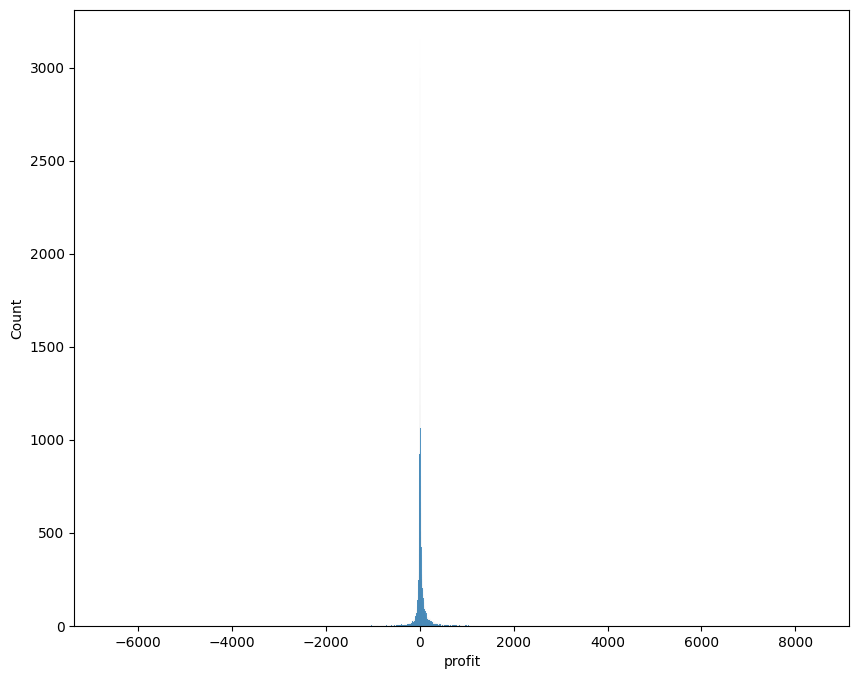

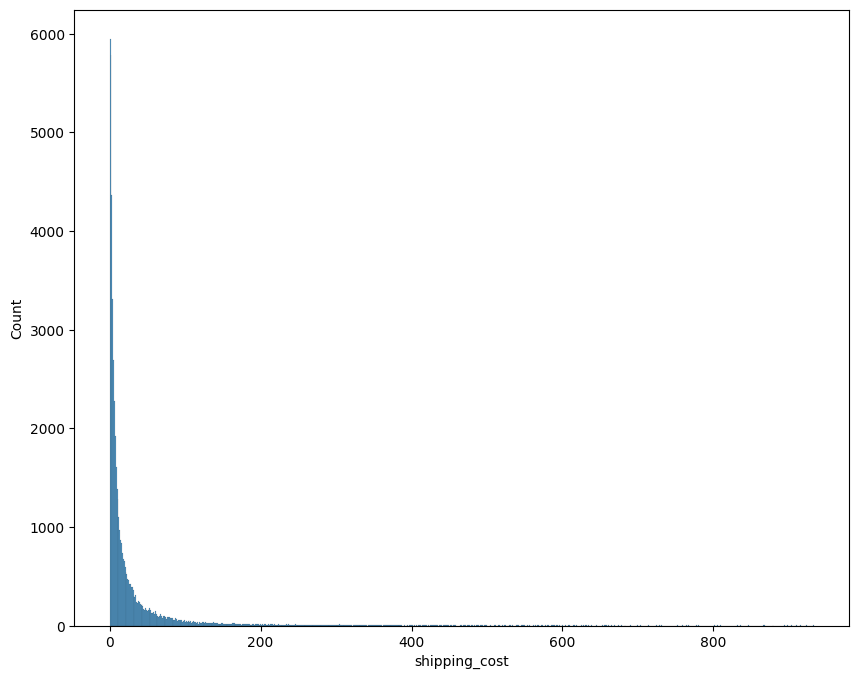

In [22]:
columnas_float = df.select_dtypes(include='float').columns.tolist()
for i in columnas_float:
    plt.figure(figsize=(10, 8))
    sns.histplot(df[i])
    plt.show()
    

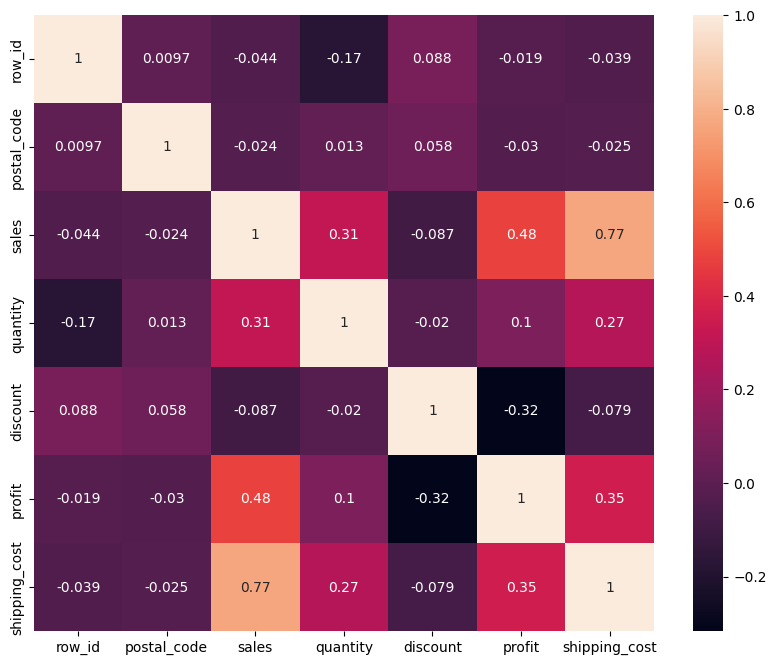

In [23]:

matrix_corr = df.corr(method="pearson",numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_corr, annot=True)
plt.show()

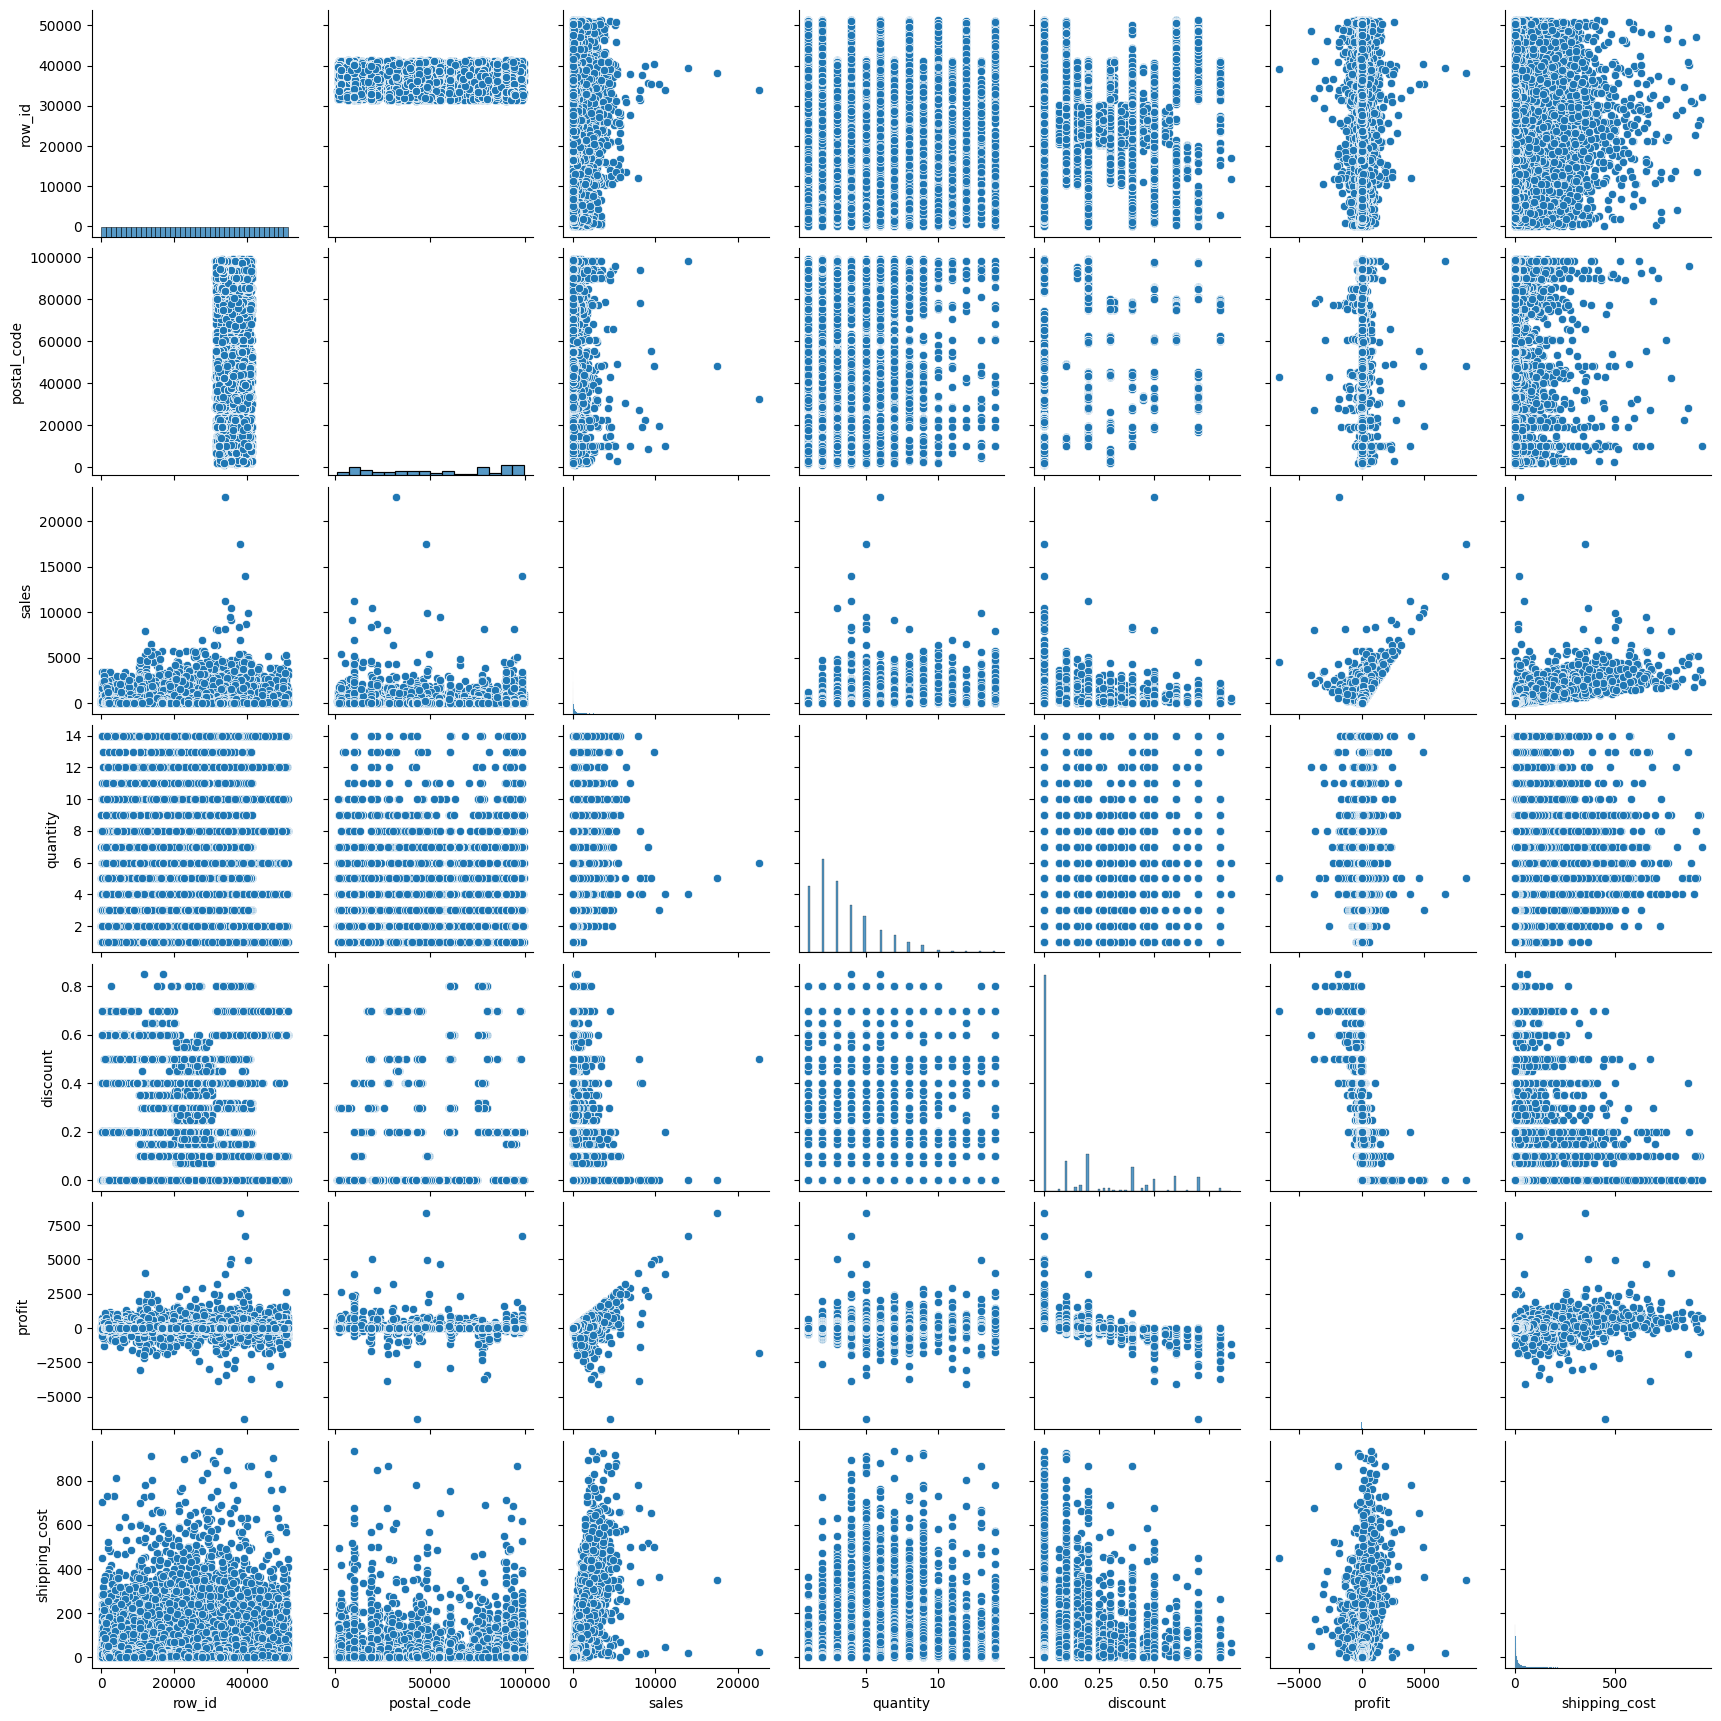

In [24]:
sns.pairplot(df)

array([[<Axes: title={'center': 'row_id'}>,
        <Axes: title={'center': 'postal_code'}>,
        <Axes: title={'center': 'sales'}>],
       [<Axes: title={'center': 'quantity'}>,
        <Axes: title={'center': 'discount'}>,
        <Axes: title={'center': 'profit'}>],
       [<Axes: title={'center': 'shipping_cost'}>, <Axes: >, <Axes: >]],
      dtype=object)

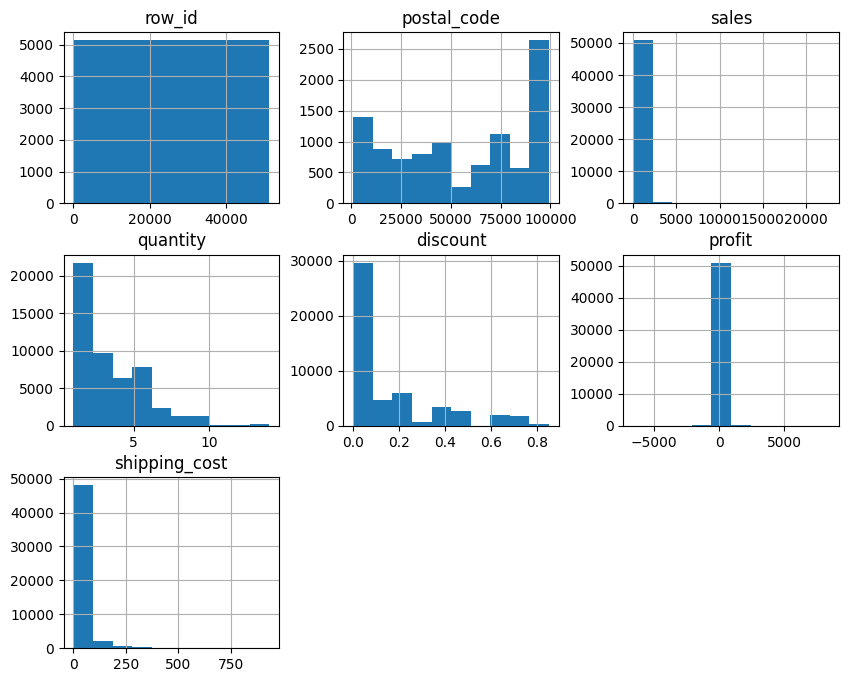

In [25]:
df.hist(figsize=(10,8))

In [26]:
df.profit.value_counts()

profit
 0.0000     668
 4.3200      70
 3.9600      69
 7.9200      67
 2.6400      63
           ... 
 0.0840       1
-57.5640      1
 5.0764       1
-4.4660       1
-0.6048       1
Name: count, Length: 24575, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          51290 non-null  int64  
 1   order_id        51290 non-null  object 
 2   order_date      51290 non-null  object 
 3   ship_date       51290 non-null  object 
 4   ship_mode       51290 non-null  object 
 5   customer_id     51290 non-null  object 
 6   customer_name   51290 non-null  object 
 7   segment         51290 non-null  object 
 8   city            51290 non-null  object 
 9   state           51290 non-null  object 
 10  country         51290 non-null  object 
 11  postal_code     9994 non-null   float64
 12  market          51290 non-null  object 
 13  region          51290 non-null  object 
 14  product_id      51290 non-null  object 
 15  category        51290 non-null  object 
 16  sub-category    51290 non-null  object 
 17  product_name    51290 non-null 

In [28]:
df.head(1)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,postal_code,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,Medium


In [29]:
categoricas = ['ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'postal_code', 'region', 'category', 'sub-category', 'product_name']

In [30]:
len(categoricas)

12

In [31]:
df['ship_mode'].value_counts()
    

ship_mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

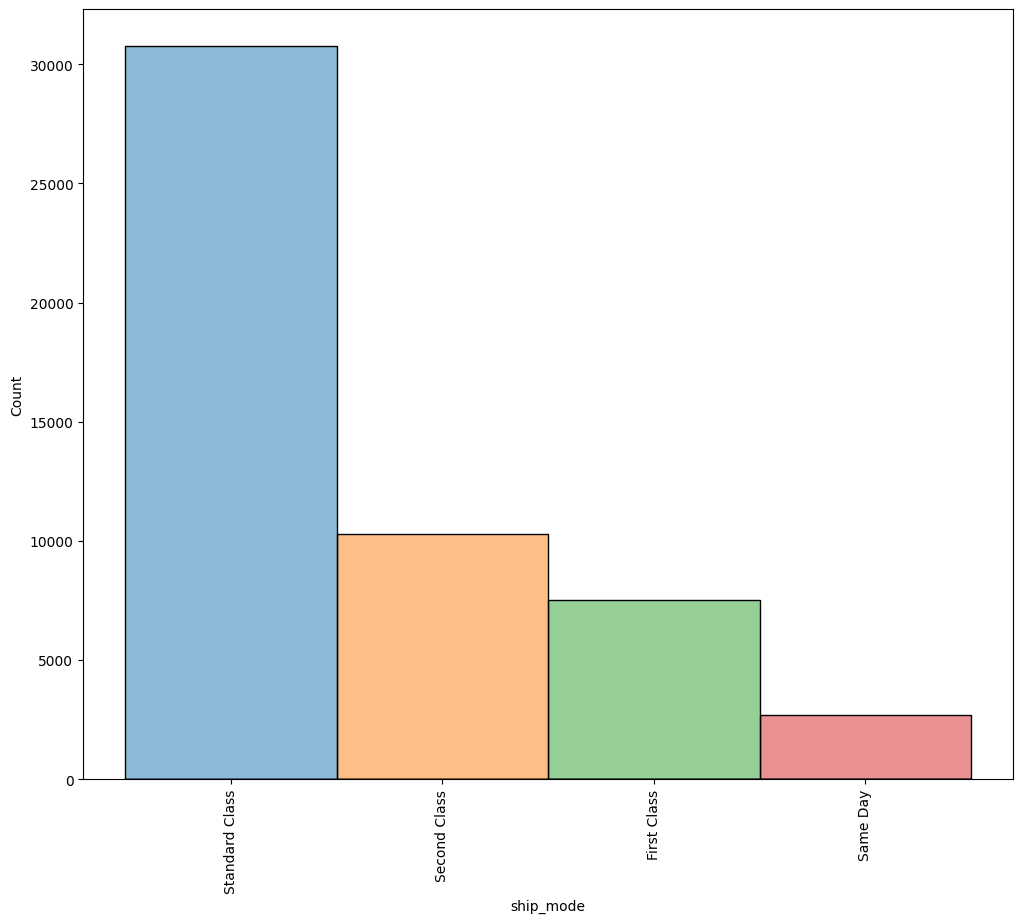

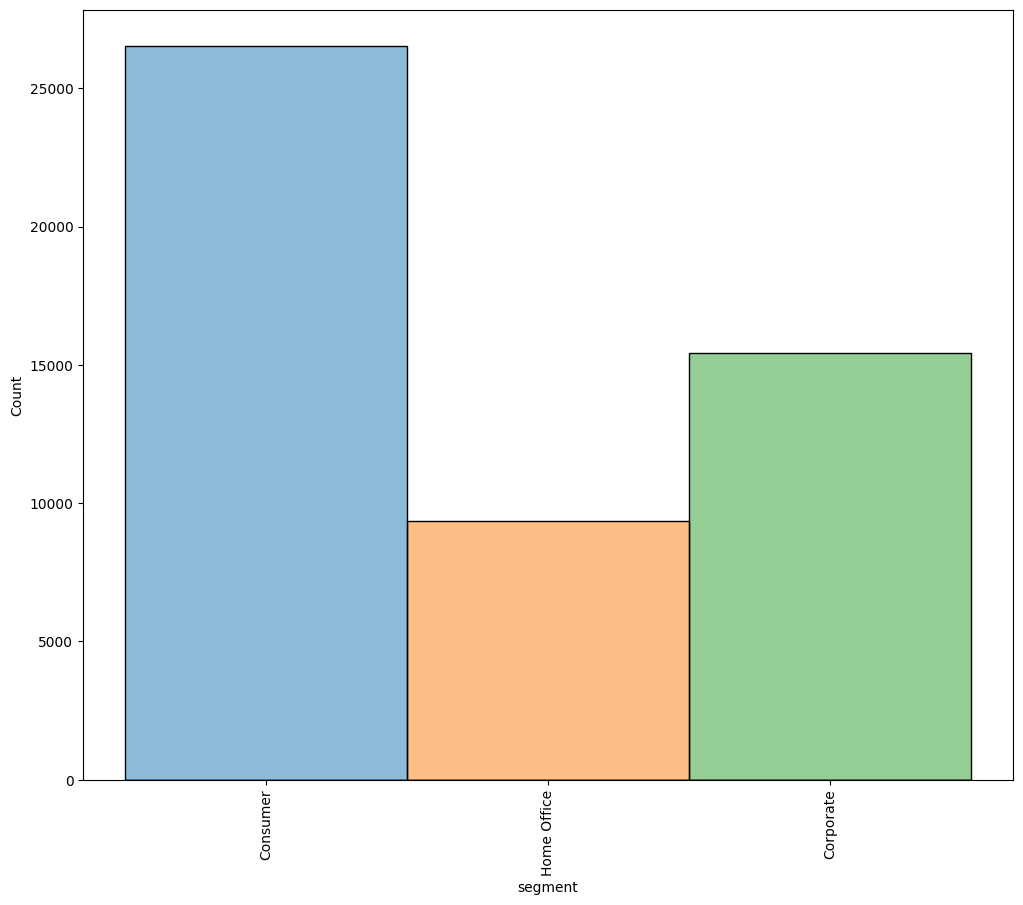

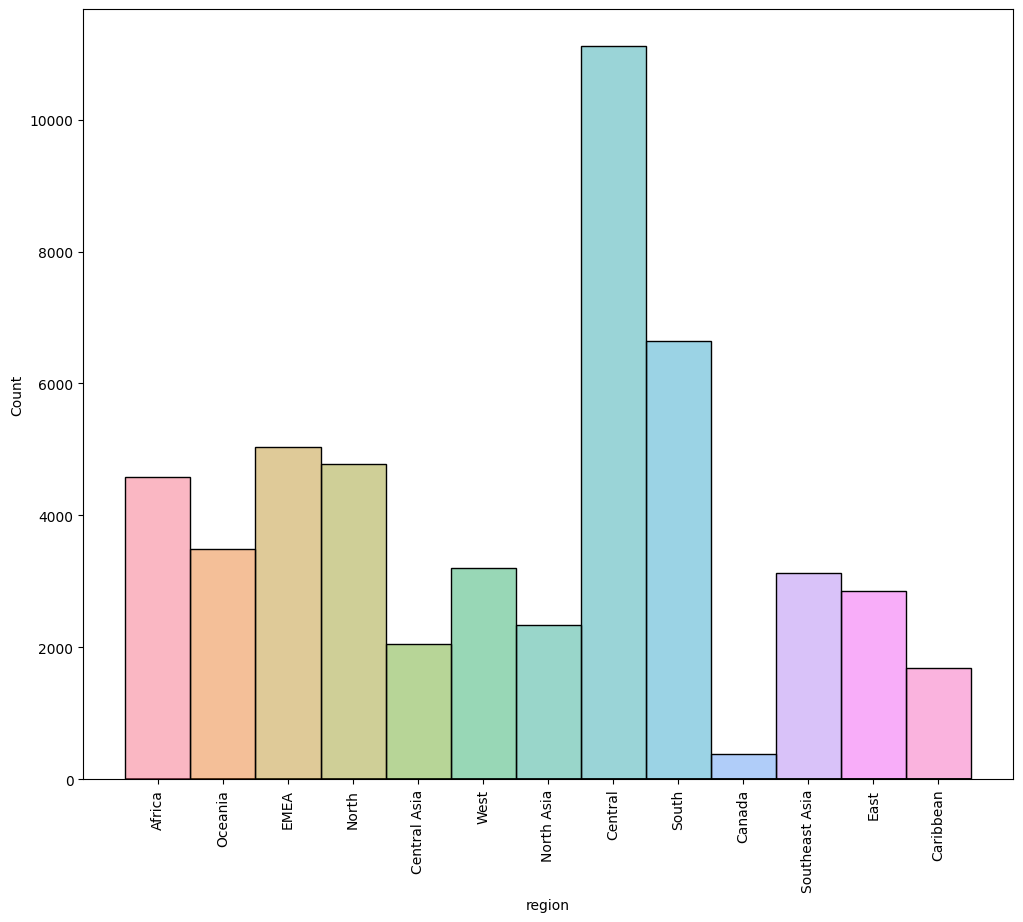

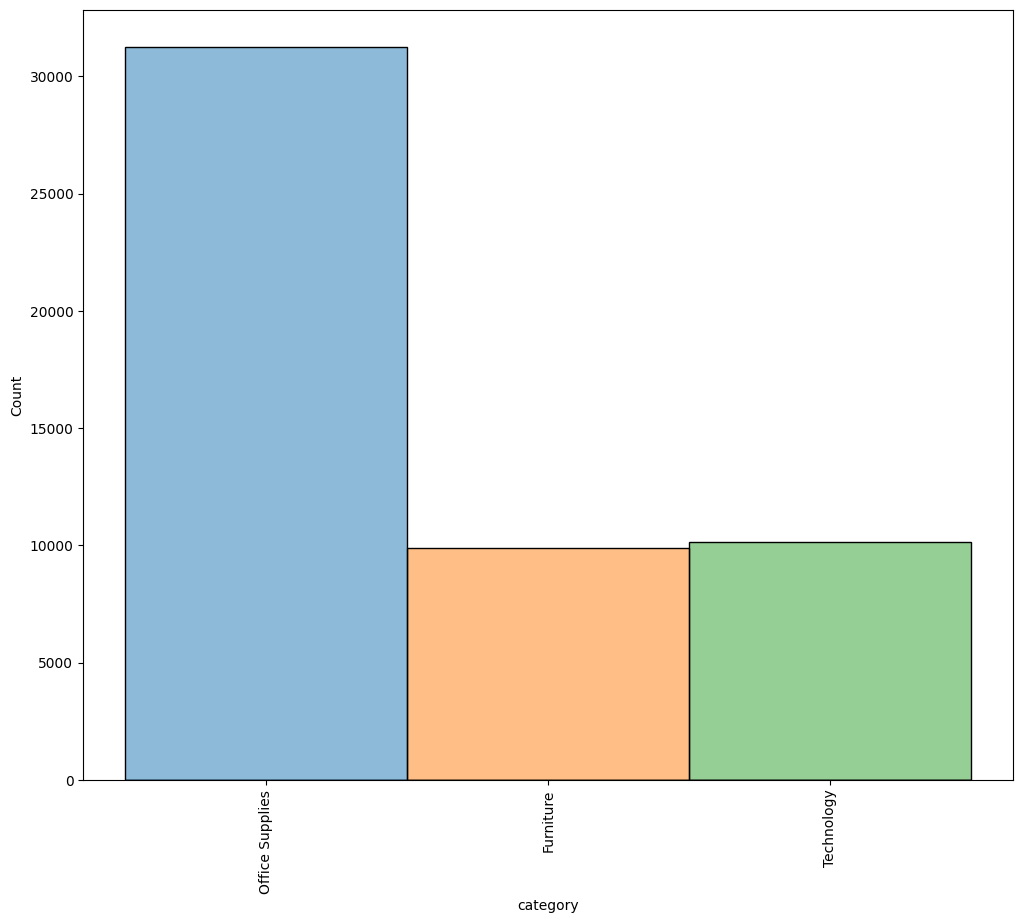

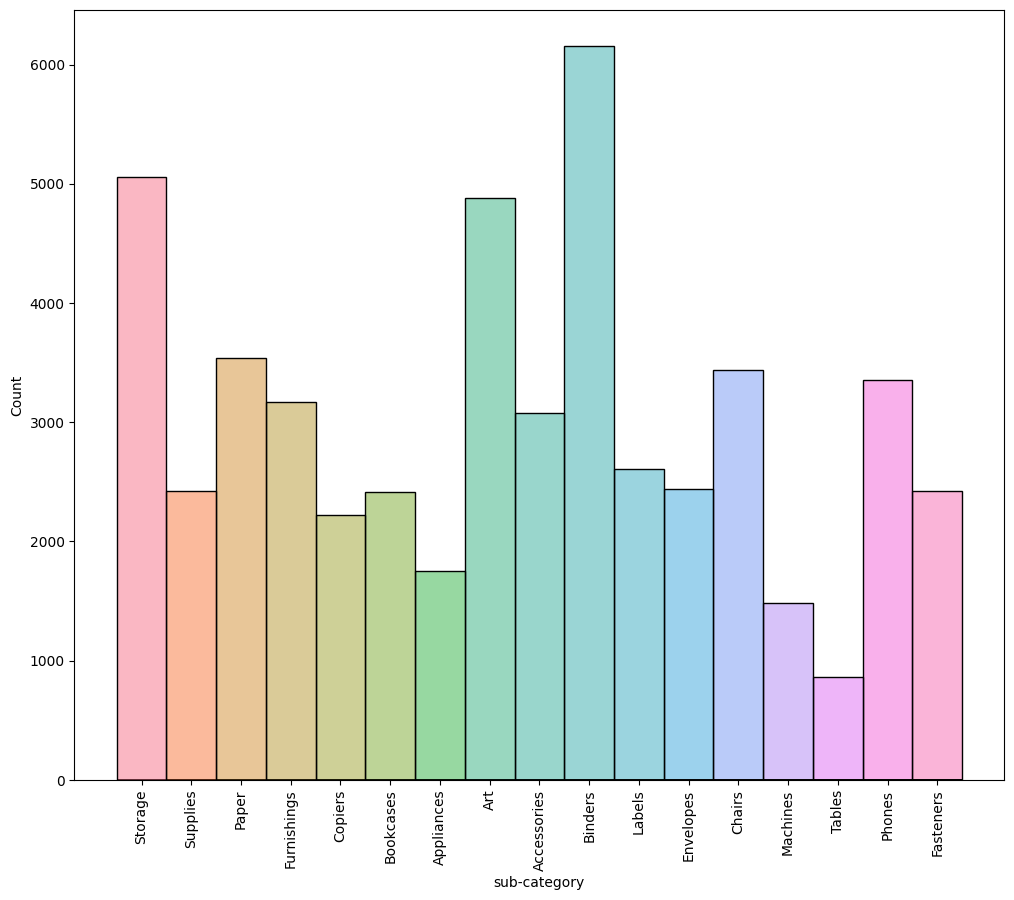

In [32]:
for i in categoricas:
    if df[i].value_counts().count() < 20:
        plt.figure(figsize=(12, 10))
        sns.histplot(df, x=i , hue=i, legend=False)
        plt.xticks(rotation = 90)
        # sns.histplot(df[i])
        plt.show()

<Axes: xlabel='ship_mode', ylabel='Count'>

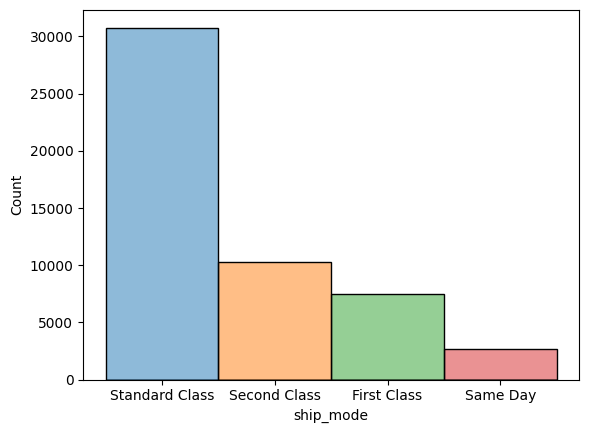

In [33]:
sns.histplot(df, x='ship_mode' , hue='ship_mode', legend=False)

In [34]:
""" 
for i in categoricas:
    if df[i].value_counts().count() > 20:
        plt.figure(figsize=(12, 10))
        sns.histplot(df, x=i , hue=i, legend=False)
        plt.xticks(rotation = 90)
        # sns.histplot(df[i])
        plt.show()
        """

' \nfor i in categoricas:\n    if df[i].value_counts().count() > 20:\n        plt.figure(figsize=(12, 10))\n        sns.histplot(df, x=i , hue=i, legend=False)\n        plt.xticks(rotation = 90)\n        # sns.histplot(df[i])\n        plt.show()\n        '

# Gráficas por Pares

df.columns

In [36]:
categoricas

['ship_mode',
 'customer_id',
 'customer_name',
 'segment',
 'country',
 'city',
 'state',
 'postal_code',
 'region',
 'category',
 'sub-category',
 'product_name']

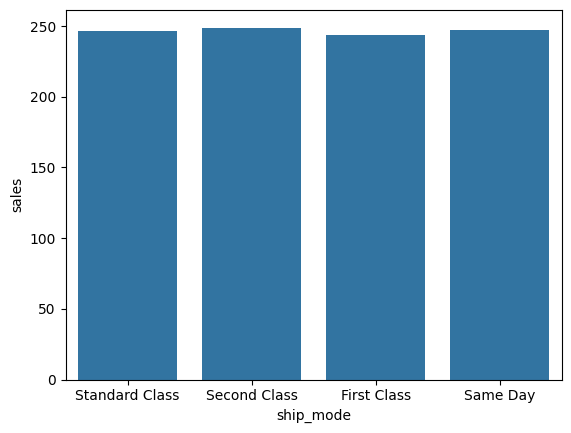

In [38]:
# Sales vs ship_mode
sns.histplot(x='ship_mode', y='sales', data=df, errorbar = None);

In [45]:
#sns.swarmplot(df,x='ship_mode', y='sales');

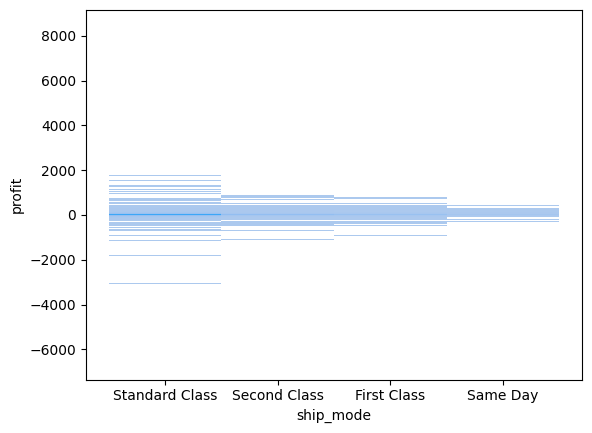

In [50]:
# profit vs ship_mode
sns.histplot(df, x='ship_mode', y='profit');

C:\Users\danie\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 146 (\x92) missing from current font.
  func(*args, **kwargs)
C:\Users\danie\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
C:\Users\danie\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 138 (\x8a) missing from current font.
  func(*args, **kwargs)
C:\Users\danie\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 148 (\x94) missing from current font.
  func(*args, **kwargs)
C:\Users\danie\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 147 (\x93) missing from current font.
  func(*args, **kwargs)
C:\Users\danie\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.

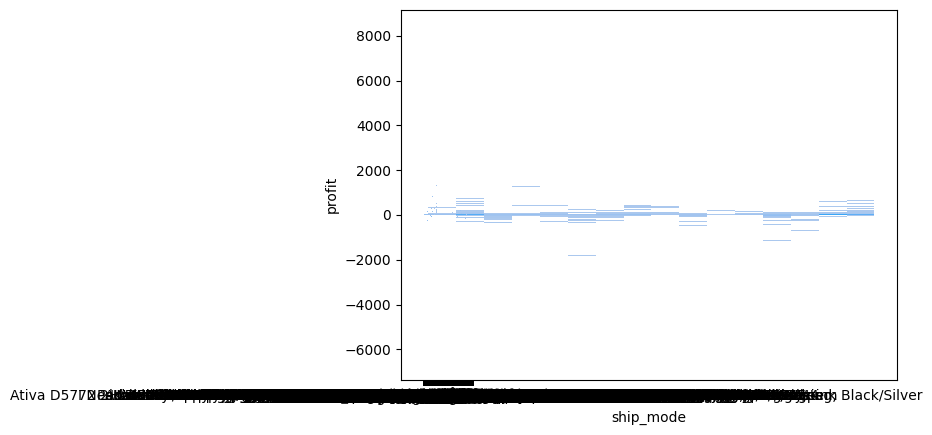

In [51]:
for i in categoricas:
    sns.histplot(df, x=i, y='profit')

In [ ]:
for i in categoricas:
    sns.histplot(df, x=i, y='sales')